In [ ]:
import pandas as pd
import numpy as np
import re
import nltk.corpus
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
#from keras.layers import Dense, Embedding,Flatten,LSTM,Bidirectional
from sklearn.model_selection import train_test_split
import sklearn.model_selection as model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from sklearn import svm,datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
File_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vR9J1s8wQy36wmUWJCWJ3dXBXHY7Sux4QMmSYmw1G86SWOytiMqkP6dRlx6TVP1CtDIuifMC-DHHV_2/pub?gid=1475446522&single=true&output=csv"
#data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/5_stock_data.xlsx')
#data.head()
data = pd.read_csv(File_path)
data

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,#Sharemarket LIVE: Sensex off day���������s hi...,1


In [ ]:
duplicated_values = data.duplicated().sum()
print( "Data Duplicated: ", duplicated_values)

Data Duplicated:  1


In [ ]:
missing_values = data.isna().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Text         0
Sentiment    0
dtype: int64


In [ ]:
data = data.drop_duplicates()
data

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,#Sharemarket LIVE: Sensex off day���������s hi...,1


In [ ]:
format = r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"
text = data['Text'].astype(str)

cleaned_texts = text.str.replace(format, "", regex=True)

print(cleaned_texts)

0       Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1       user AAP MOVIE 55 return for the FEAGEED indic...
2       user Id be afraid to short AMZN  they are look...
3                                          MNTA Over 1200
4                                           OI  Over 2137
                              ...                        
5786    Industry body CII said discoms are likely to s...
5787    Gold prices slip below Rs 46000 as investors b...
5788    Workers at Bajaj Auto have agreed to a 10 wage...
5789    Sharemarket LIVE Sensex off days high up 600 p...
5790    Sensex Nifty climb off days highs still up 2 K...
Name: Text, Length: 5790, dtype: object


In [ ]:
def convert_labels_to_binary(label):
    if label == -1:
        return 0
    elif label == 1:
        return 1
labels = data['Sentiment']
labels = [convert_labels_to_binary(label) for label in labels]
labels

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,


In [ ]:
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

texts = cleaned_texts.values

def remove_stopwords(text):
    words = word_tokenize(text)
    cleaned_words = [word for word in words if word.lower() not in stop]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in cleaned_words]
    return " ".join(lemmatized_words)

def convert_labels_to_binary(label):
    #if label == -1:
        #return 0
    #elif label == 1:
        #return 1
#labels = data['Sentiment']
#labels = [convert_labels_to_binary(label) for label in labels]
#y = np.array(labels)
#y

cleaned_stopw = [remove_stopwords(text) for text in texts]
print(cleaned_stopw)

['Kickers watchlist XIDE TIT SOQ PNK CPW BPZ AJ trade method 1 method 2 see prev post', 'user AAP MOVIE 55 return FEAGEED indicator 15 trade year AWESOME', 'user Id afraid short AMZN looking like nearmonopoly eBooks infrastructureasaservice', 'MNTA 1200', 'OI 2137', 'PGNX 304', 'AAP user current downtrend break Otherwise shortterm correction medterm downtrend', 'Mondays relative weakness NYX WIN TIE TAP ICE INT BMC AON C CHK BIIB', 'GOOG ower trend line channel test volume support', 'AAP watch tomorrow ONG entry', 'im assuming FCX open tomorrow 3425 trigger buy still much like setup', 'really worry everyone expects market rally nowusually exact opposite happens every time shall see soon bac spx jpm', 'AAP GAMCOs arry Haverty Apple Extremely Cheap Great Video', 'user Maykiljil posted agree MSFT going higher possibly north 30', 'Momentum coming back ETFC Broke MA200 resistance solid volume Friday ong setup', 'HA Hitting 3565 mean resume targeting 42 level', 'user gameplan shot today like

In [ ]:
print(cleaned_stopw)
print(labels )

['Kickers watchlist XIDE TIT SOQ PNK CPW BPZ AJ trade method 1 method 2 see prev post', 'user AAP MOVIE 55 return FEAGEED indicator 15 trade year AWESOME', 'user Id afraid short AMZN looking like nearmonopoly eBooks infrastructureasaservice', 'MNTA 1200', 'OI 2137', 'PGNX 304', 'AAP user current downtrend break Otherwise shortterm correction medterm downtrend', 'Mondays relative weakness NYX WIN TIE TAP ICE INT BMC AON C CHK BIIB', 'GOOG ower trend line channel test volume support', 'AAP watch tomorrow ONG entry', 'im assuming FCX open tomorrow 3425 trigger buy still much like setup', 'really worry everyone expects market rally nowusually exact opposite happens every time shall see soon bac spx jpm', 'AAP GAMCOs arry Haverty Apple Extremely Cheap Great Video', 'user Maykiljil posted agree MSFT going higher possibly north 30', 'Momentum coming back ETFC Broke MA200 resistance solid volume Friday ong setup', 'HA Hitting 3565 mean resume targeting 42 level', 'user gameplan shot today like

In [ ]:
tokenizer = Tokenizer()
 tokenizer.fit_on_texts(cleaned_stopw)
 tts = tokenizer.texts_to_sequences(cleaned_stopw)
 max_length = max([len(s) for s in tts])
 print("max sentense's length = " , max_length)
 X = pad_sequences(tts, maxlen=max_length, padding="post")
 print("Sequence Padding at maxlen words, post padding:\n", X)
  vocab_size = len(tokenizer.word_index) +1
 print("vocab size : ",vocab_size)

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(cleaned_stopw)

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversampler.fit_resample(X, labels)
y = np.array(y_resampled )
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y,test_size = 0.20,random_state = 42)

In [ ]:
# สร้างโมเดล Support Vector Machine ใช้ kernel แบบ RBF (Radial Basis Function)
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=1)
# สร้างโมเดล Support Vector Machine ใช้ kernel แบบ poly (polynomial function)
poly = svm.SVC(kernel='poly', degree=3, C=1)

In [ ]:
#train

rbf.fit(X_train, y_train)
poly.fit(X_train, y_train)

SVC(C=1, kernel='poly')

In [ ]:
#predict

poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
print("Predict (RBF):", rbf_pred)
print("Predict (Poly):", poly_pred)

Predict (RBF): [0 0 1 ... 0 1 0]
Predict (Poly): [0 1 1 ... 1 1 0]


In [ ]:
#ค่าความแม่นยำ
accuracy_rbf = accuracy_score(y_test, rbf_pred)
accuracy_poly = accuracy_score(y_test, poly_pred)

print("Accuracy (RBF):", accuracy_rbf)
print("Accuracy (Poly):", accuracy_poly)

Accuracy (RBF): 0.8554952510176391
Accuracy (Poly): 0.8663500678426052


In [ ]:
'''
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
'''

'\npoly_accuracy = accuracy_score(y_test, poly_pred)\npoly_f1 = f1_score(y_test, poly_pred, average=\'weighted\')\nprint(\'Accuracy (Polynomial Kernel): \', "%.2f" % (poly_accuracy*100))\nprint(\'F1 (Polynomial Kernel): \', "%.2f" % (poly_f1*100))\n'

In [ ]:
print(classification_report(y_test,rbf_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       703
           1       0.88      0.84      0.86       771

    accuracy                           0.86      1474
   macro avg       0.86      0.86      0.86      1474
weighted avg       0.86      0.86      0.86      1474



In [ ]:
print(classification_report(y_test,poly_pred))

              precision    recall  f1-score   support

           0       0.99      0.72      0.84       703
           1       0.80      1.00      0.89       771

    accuracy                           0.87      1474
   macro avg       0.90      0.86      0.86      1474
weighted avg       0.89      0.87      0.86      1474



In [ ]:
'''
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))
'''

'\nrbf_accuracy = accuracy_score(y_test, rbf_pred)\nrbf_f1 = f1_score(y_test, rbf_pred, average=\'weighted\')\nprint(\'Accuracy (RBF Kernel): \', "%.2f" % (rbf_accuracy*100))\nprint(\'F1 (RBF Kernel): \', "%.2f" % (rbf_f1*100))\n'

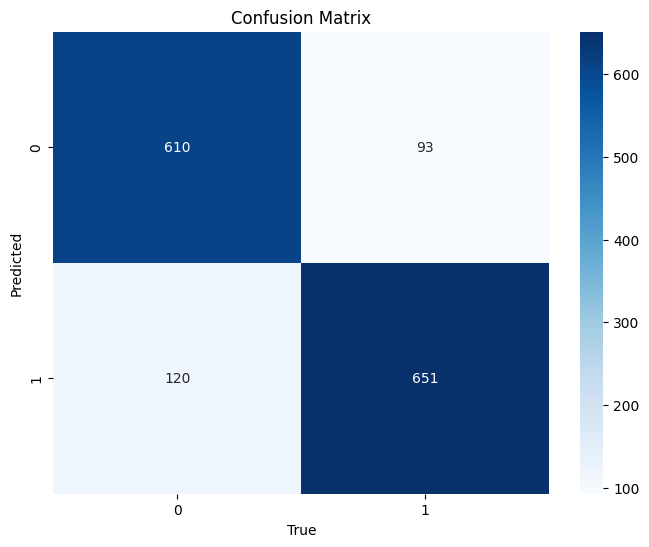

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       703
           1       0.88      0.84      0.86       771

    accuracy                           0.86      1474
   macro avg       0.86      0.86      0.86      1474
weighted avg       0.86      0.86      0.86      1474



In [ ]:
# rbf_pred = rbf.predict(X_test)
# rbf_pred = rbf_pred > 0.5
confusion_mat = confusion_matrix(y_test,rbf_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

target_names = ['0', '1']
report = classification_report(y_test, rbf_pred, target_names=target_names)
print(report)

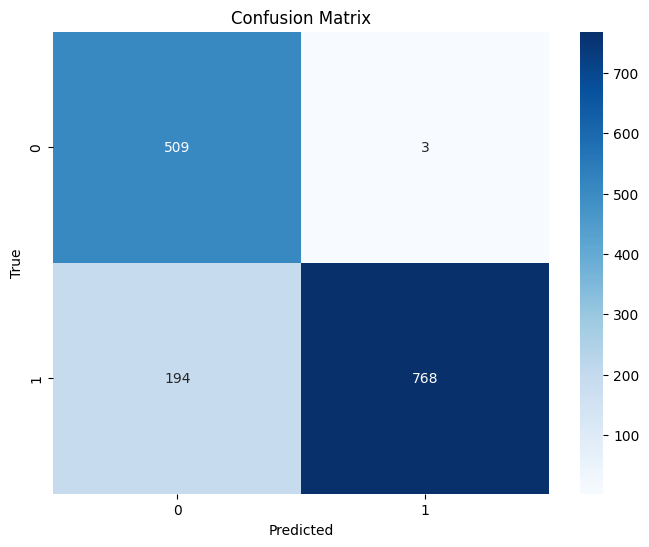

              precision    recall  f1-score   support

           0       0.99      0.72      0.84       703
           1       0.80      1.00      0.89       771

    accuracy                           0.87      1474
   macro avg       0.90      0.86      0.86      1474
weighted avg       0.89      0.87      0.86      1474



In [ ]:
# poly_pred = poly.predict(X_test)
# poly_pred = poly_pred > 0.5
confusion_mat = confusion_matrix(poly_pred,y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

target_names = ['0', '1']
report = classification_report(y_test, poly_pred, target_names=target_names)
print(report)

In [ ]:
'''
new_text = "long MS small"
new_text_tokenized = word_tokenize(new_text) #keep_whitespace=False)
new_text_tfidf = tfidf_vectorizer.transform([" ".join(new_text_tokenized)])
y_pred_rbf = rbf.predict(new_text_tfidf)
y_pred_poly = poly.predict(new_text_tfidf)
print('Predict (RBF):', y_pred_rbf)
print('Predict (Poly):', y_pred_poly)
'''

'\nnew_text = "long MS small"\nnew_text_tokenized = word_tokenize(new_text) #keep_whitespace=False)\nnew_text_tfidf = tfidf_vectorizer.transform([" ".join(new_text_tokenized)])\ny_pred_rbf = rbf.predict(new_text_tfidf)\ny_pred_poly = poly.predict(new_text_tfidf)\nprint(\'Predict (RBF):\', y_pred_rbf)\nprint(\'Predict (Poly):\', y_pred_poly)\n'

In [ ]:
#predict kernel rbf
new_text = "SD this is the ammo to help fire Tom Ward, was needed imho... unfortunately once again at the shareholders expense. NG SO"
new_text_tfidf = tfidf_vectorizer.transform([new_text])
predictions = rbf.predict(new_text_tfidf)
predicted_label_rbf = 1 if predictions > 0.5 else 0
predicted_label_rbf

1

In [ ]:
#predict kernel polynomial
new_text = "SD this is the ammo to help fire Tom Ward, was needed imho... unfortunately once again at the shareholders expense. NG SO"
new_text_tfidf = tfidf_vectorizer.transform([new_text])
predictions = poly.predict(new_text_tfidf)
predicted_label_poly = 1 if predictions > 0.5 else 0
predicted_label_poly

1

In [ ]:
import joblib

# เซฟโมเดล SVM แบบ RBF
with open('svm_rbf_model.pkl', 'wb') as file:
    joblib.dump(rbf, file)

# เซฟโมเดล SVM แบบ Poly
with open('svm_poly_model.pkl', 'wb') as file:
    joblib.dump(poly, file)

with open('svm_vectorizer.pkl', 'wb') as file:
    joblib.dump(tfidf_vectorizer, file)

In [ ]:
#แก้ไข code เพื่อให้ส่งข้อมูลตัดคำไปทำ vectorizer ได้ถูกต้อง และจะทำให้ classify ได้ถูกต้อง
#new_text = "Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts"

#y_preds = rbf.predict(new_text)
#print('predict : ',y_preds)

In [ ]:
# 4. Create an SVM model (Support Vector Classifier - SVC)
#svm_model = SVC(kernel='linear')  # You can choose different kernel functions like 'linear', 'rbf', 'poly', etc.

In [ ]:
# 5. Train the model on the training data
#svm_model.fit(X_train, y_train)

In [ ]:
# 6. Make predictions on the test data
#y_pred = svm_model.predict(X_test)

In [ ]:
# 7. Evaluate the model
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)